In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
# Temp, rain, snow, and clouds predicting traffic volume
X = traffic_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']]
Y = traffic_df['traffic_volume'].to_numpy()

Y = Y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

rain_reg = LinearRegression().fit(X_train, Y_train)
coef = rain_reg.coef_[0]
intercept = rain_reg.intercept_[0]

train_err = mean_squared_error(Y_test, rain_reg.predict(X_test))
test_err = mean_squared_error(Y_train, rain_reg.predict(X_train))

In [4]:
print("Training error is:", train_err)
print("Testing error is:", test_err)
print("Rain Model: Traffic Volume = {}temp + {}rain_1h + {}snow_1h + {}clouds_all {}".format(coef[0], coef[1], coef[2], coef[3], intercept))

Training error is: 3799938.6620990518
Testing error is: 3868537.391502082
Rain Model: Traffic Volume = 20.377142164435302temp + 0.141759285470125rain_1h + 618.5936697549884snow_1h + 3.8994136809224975clouds_all -2662.125599678874


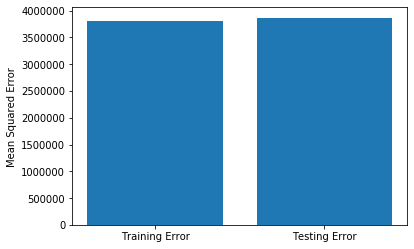

In [5]:
plt.bar(x = ["Training Error", "Testing Error"], height = [train_err, test_err])
plt.ylabel("Mean Squared Error")
plt.show()